Check Python version

In [1]:
!python --version

Python 3.10.6


Import libraries

In [2]:
import json
import yaml
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

### **Extract Data**

In [3]:
# Local directory
# data_dir = "../datasets/retail"
# file_name = "air_passengers"
# file_path = f"{data_dir}/{file_name}.csv"

# Through online GitHub
file_path = "https://github.com/ourownstory/neuralprophet-data/raw/main/datasets/air_passengers.csv"

In [4]:
train_df = pd.read_csv(file_path)

In [5]:
train_df.shape

(144, 2)

In [6]:
train_df.columns

Index(['ds', 'y'], dtype='object')

In [7]:
train_df.head()

,ds,y
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [8]:
train_df.tail()

,ds,y
139,1960-08-01,606
140,1960-09-01,508
141,1960-10-01,461
142,1960-11-01,390
143,1960-12-01,432


Change 'y' to float

In [9]:
train_df["y"] = train_df["y"].astype(float)

In [10]:
train_df.head()

,ds,y
0,1949-01-01,112.0
1,1949-02-01,118.0
2,1949-03-01,132.0
3,1949-04-01,129.0
4,1949-05-01,121.0


Plot graph

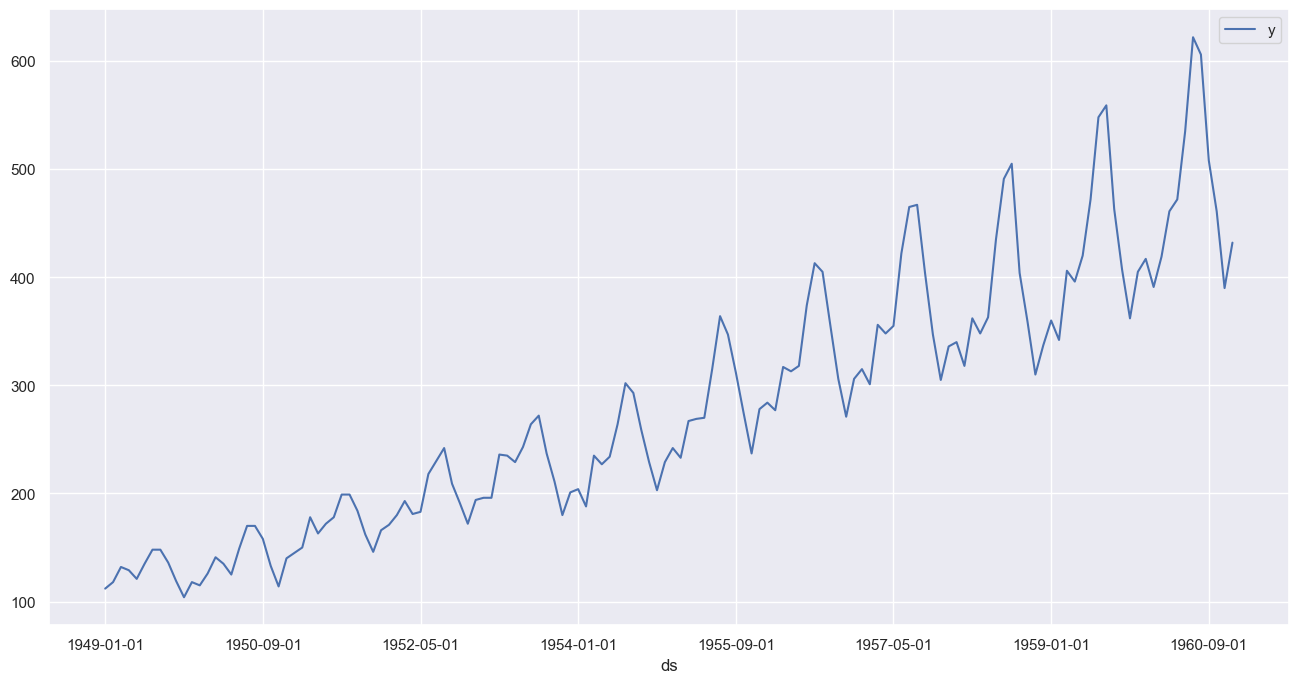

In [11]:
figsize = (16, 8)
train_df.set_index("ds").plot(figsize=figsize);

### **Train API**

Train data: convert df to list-of-list

In [12]:
train_data = []

In [13]:
for value in train_df.values:
    train_data.append(list(value))

In [14]:
train_data[:10]

[['1949-01-01', 112.0],
 ['1949-02-01', 118.0],
 ['1949-03-01', 132.0],
 ['1949-04-01', 129.0],
 ['1949-05-01', 121.0],
 ['1949-06-01', 135.0],
 ['1949-07-01', 148.0],
 ['1949-08-01', 148.0],
 ['1949-09-01', 136.0],
 ['1949-10-01', 119.0]]

Define Model Request (optional)

In [15]:
# Default model request
# model_request = {
#     'type': 'darts_autotheta',
#     'score': ['mape'],
#     'param': None,
# }

# Custom model request
model_request = {
    'type': 'meta_wa',
    'score': ['smape', 'mape'],
    'param': {
        'base_models': [
            {'type': 'darts_autoarima'},
            {'type': 'darts_autotheta'},
            {'type': 'darts_autoets'},
            {'type': 'stats_autotheta'},
        ]
    },
}

Train API JSON Payload

In [16]:
api_json = {
    'data': train_data,
    # 'model': model_request,  # (optional) can be commented out
}

Build URL

In [17]:
with open('url_local.yaml', 'r') as file:
    url_dict = yaml.safe_load(file)

In [18]:
# URL to our SYBIL AWS service
protocol = url_dict["protocol"]
host = url_dict["host"]
port = url_dict["port"]
endpoint = "train"

url = "%s://%s:%s/%s" % (protocol, host, str(port), endpoint)

In [19]:
protocol, host, port

('http', 'localhost', 8080)

Call endpoint, receive response JSON, write to output file

In [20]:
%%time
# TODO: gain a accredited cert and remove verify=False
response = requests.post(url, json=api_json, verify=False)

CPU times: total: 0 ns
Wall time: 4.19 s


In [21]:
train_json_out = response.json()  # dict output
# train_json_out = json.dumps(response.json())  # str output
# train_json_out = json.dumps(response.json(), indent=4)  # str output w tabs

In [22]:
train_json_out

{'model': 'AgEBCIHeAACA3gAAaZQAABgAAABklAAAhREAAD+AAC5wlGmUYXJhbG+MSZOMZ25fjGEHeJOMjIyMdWUubR9wTWyUc3OBlJROKUtOGHRylHOMbW9udBRydCl0X4x0ZR9lk4xkbZR5YZRygV99YXJiZGKUZJSUeW6MSUGTKJRzbh9hlERJaHR4BHBsYXBjcmVhcnNtdHJcjIyTiIz//24BjB9jdIxzlHIAlIWUS///bgGJFqdL3B6v8YITVeYouUrufx/BUpQltviJy1ztkSJk9TfIWZssbv+QgxRW5ym6S40eYB/xgia3+YrMXe4wwQOUJclanC1vAJHTZKY3yGz9P9ASox80dgdJ2mte7zHCBJUmaPk7zF0BktRlpzjJC5zebwCkNR93CErbbK4/gRKjR9gaq+1+D1HiJLVGOcoMnd9wAUPUFh+UcmJoBmhflGSGcENoaChkLi5fZQWUaIcBOChO/2JhdR9gh2RLYpRfjGWMLmRQZJRuU2iHaIeQBKgsxUl+Aje7Px91+S6yNs5SiAxBxUl/Azi8QNhckhZLz1OIDELGSjG16h9uoyer4WWaHqI6vvR4rTG162+kKKxEyP6Ctzu/9HiuMh+2TtIHi8FFyf6CuDzApipg5BmdIVfbEJQYsDRq7iOnKx9g5BqeIro+dPctsTVq7iSoLMRIfQE3uz90+C6yNhyg1h9ajxOXzVGGlG5ic3NolIyUc5SUlHKUi5R9bpSFoYtolBBtYWhhgWhtSJRLh5RL//+AAOCGAB9odHaUYWiGbZRzbZRfchR2bxhfb3NhcnJmb19OeHNpFQthcox0X3R1dXKMZHSACh90coxhDXALaXJjKG5ObpQAZGFhaWRvU2FylGlfYQBhEh9oZ3V1dGN2lHNvc2VlYWx0YWx1coxllHNuaGxwS5SGdQJjlHKgCh9hc05yZnVhYWxvgQBabWEBZQZHiECMjJTNhmOwZeiWjB9Bh5RpdHMHlEtSl

### **Forecast API**

Forecast Dates: predict the next 2 years of air passenger data (1961-1962)

In [23]:
dates = [
    "1961-01-01", "1961-02-01", "1961-03-01", "1961-04-01", "1961-05-01", "1961-06-01",
    "1961-07-01", "1961-08-01", "1961-09-01", "1961-10-01", "1961-11-01", "1961-12-01",
    "1962-01-01", "1962-02-01", "1962-03-01", "1962-04-01", "1962-05-01", "1962-06-01",
    "1962-07-01", "1962-08-01", "1962-09-01", "1962-10-01", "1962-11-01", "1962-12-01",
]

Model from Train API

In [24]:
model = train_json_out["model"]

Forecast API JSON Payload

In [25]:
api_json = {
    'model': model,
    'predicts': dates
}

Build URL (same as train except for the endpoint)

In [26]:
endpoint = "forecast"

url = "%s://%s:%s/%s" % (protocol, host, str(port), endpoint)

Call endpoint, receive response JSON, write to output file

In [27]:
%%time
# TODO: gain a accredited cert and remove verify=False
response = requests.post(url, json=api_json, verify=False)

CPU times: total: 15.6 ms
Wall time: 78.3 ms


In [28]:
forecast_json_out = response.json()  # dict output
# forecast_json_out = json.dumps(response.json())  # str output
# forecast_json_out = json.dumps(response.json(), indent=4)  # str output w tabs

In [29]:
forecast_json_out

{'data': [['1960-12-31T00:00:00', 420.4216160474048],
  ['1961-01-30T00:00:00', 398.08444372370235],
  ['1961-03-01T00:00:00', 447.6590221321015],
  ['1961-03-31T00:00:00', 470.8748350825777],
  ['1961-04-30T00:00:00', 484.0539751673827],
  ['1961-05-30T00:00:00', 565.2277983303802],
  ['1961-06-29T00:00:00', 652.126784095771],
  ['1961-07-29T00:00:00', 645.6961694311942],
  ['1961-08-28T00:00:00', 543.092745884881],
  ['1961-09-27T00:00:00', 478.8926523044692],
  ['1961-10-27T00:00:00', 400.2572654310223],
  ['1961-11-26T00:00:00', 457.9422409829188],
  ['1961-12-26T00:00:00', 470.47103535290574],
  ['1962-01-25T00:00:00', 447.19418575457854],
  ['1962-02-24T00:00:00', 501.139054714132],
  ['1962-03-26T00:00:00', 523.243708920714],
  ['1962-04-25T00:00:00', 536.616075911907],
  ['1962-05-25T00:00:00', 622.4305978285531],
  ['1962-06-24T00:00:00', 713.3480375241629],
  ['1962-07-24T00:00:00', 706.6827042158402],
  ['1962-08-23T00:00:00', 598.4488596222645],
  ['1962-09-22T00:00:00', 52

Combine forecast dates and output

In [38]:
forecast_df = pd.DataFrame(forecast_json_out["data"], columns = ["ds", "y"])

In [39]:
forecast_df.shape

(24, 2)

In [40]:
forecast_df.columns

Index(['ds', 'y'], dtype='object')

In [41]:
forecast_df.head()

,ds,y
0,1960-12-31T00:00:00,420.421616
1,1961-01-30T00:00:00,398.084444
2,1961-03-01T00:00:00,447.659022
3,1961-03-31T00:00:00,470.874835
4,1961-04-30T00:00:00,484.053975


In [42]:
forecast_df.tail()

,ds,y
19,1962-07-24T00:00:00,706.682704
20,1962-08-23T00:00:00,598.448860
21,1962-09-22T00:00:00,529.348888
22,1962-10-22T00:00:00,446.454852
23,1962-11-21T00:00:00,507.588502


Plot train and forecast side-by-side

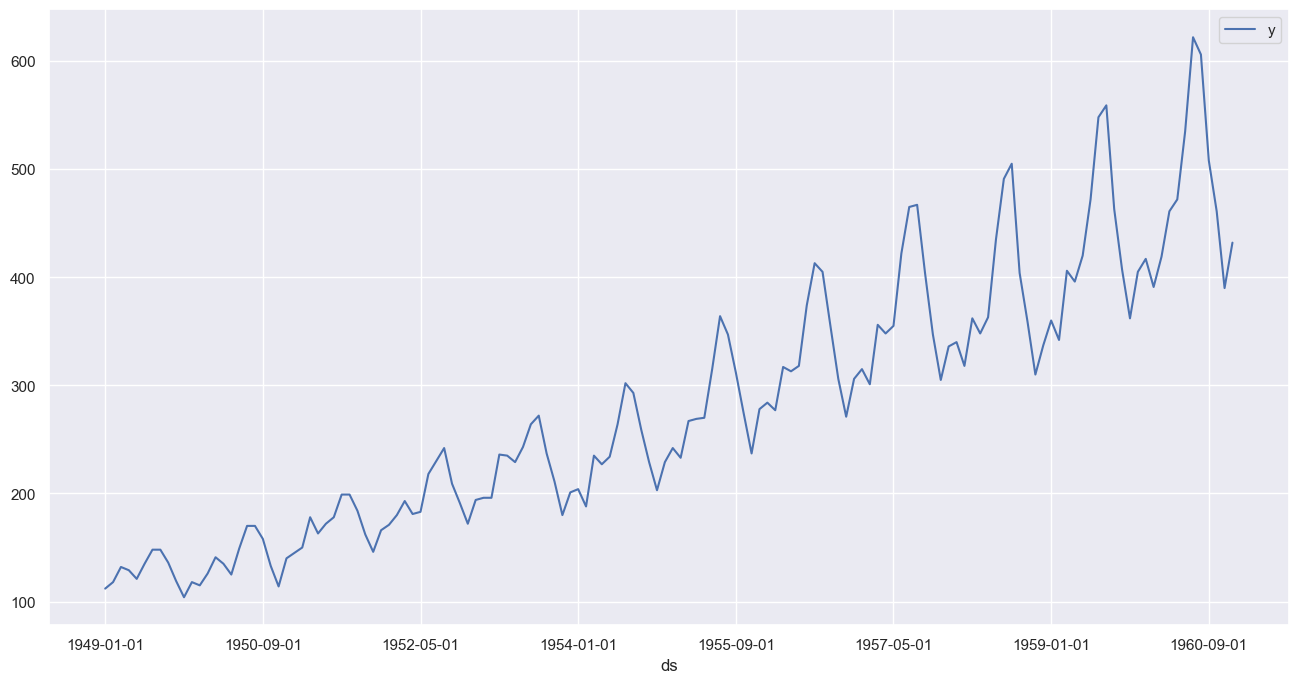

In [43]:
train_df["color"] = "b"
train_df.set_index("ds").plot(figsize=figsize, color=train_df["color"]);

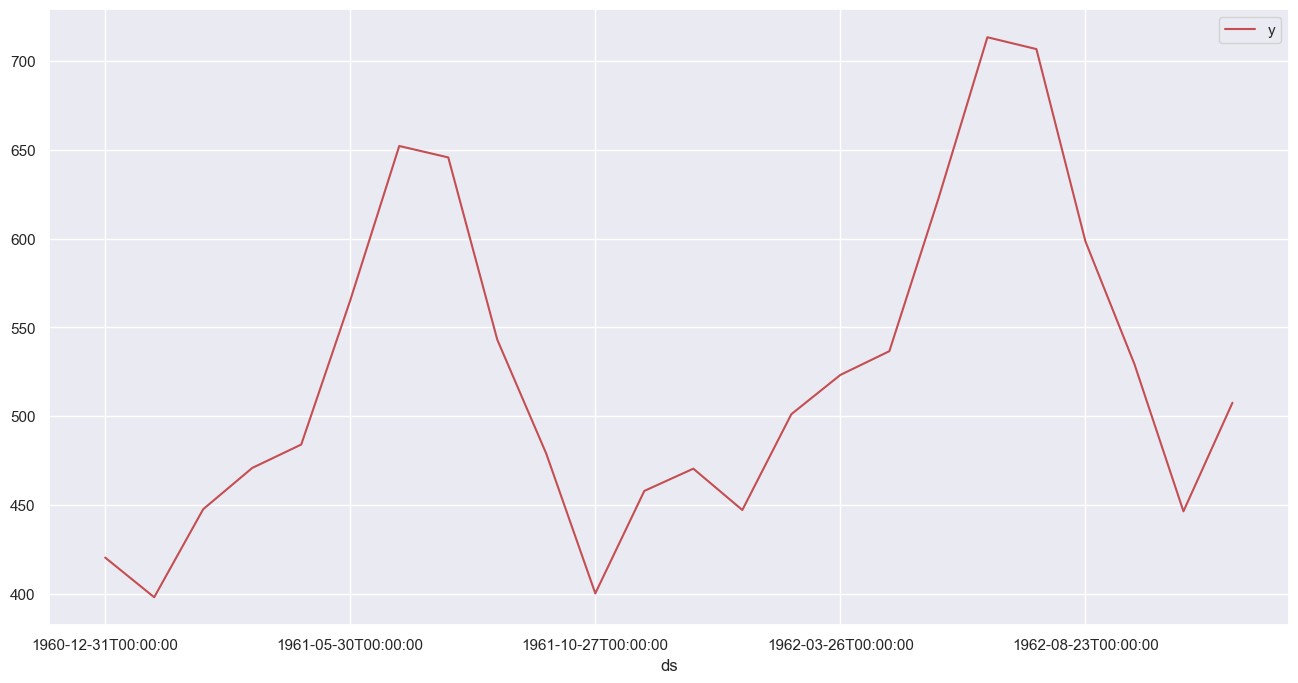

In [44]:
forecast_df["color"] = "r"
forecast_df.set_index("ds").plot(figsize=figsize, color=forecast_df["color"]);

Combine train and test sets

In [45]:
df = pd.concat([train_df, forecast_df]).reset_index(drop=True)

In [46]:
df.shape

(168, 3)

In [47]:
df.head()

,ds,y,color
0,1949-01-01,112.0,b
1,1949-02-01,118.0,b
2,1949-03-01,132.0,b
3,1949-04-01,129.0,b
4,1949-05-01,121.0,b


In [48]:
df.tail()

,ds,y,color
163,1962-07-24T00:00:00,706.682704,r
164,1962-08-23T00:00:00,598.448860,r
165,1962-09-22T00:00:00,529.348888,r
166,1962-10-22T00:00:00,446.454852,r
167,1962-11-21T00:00:00,507.588502,r


Plot combined train and test sets with the vertical black line as the cut-off

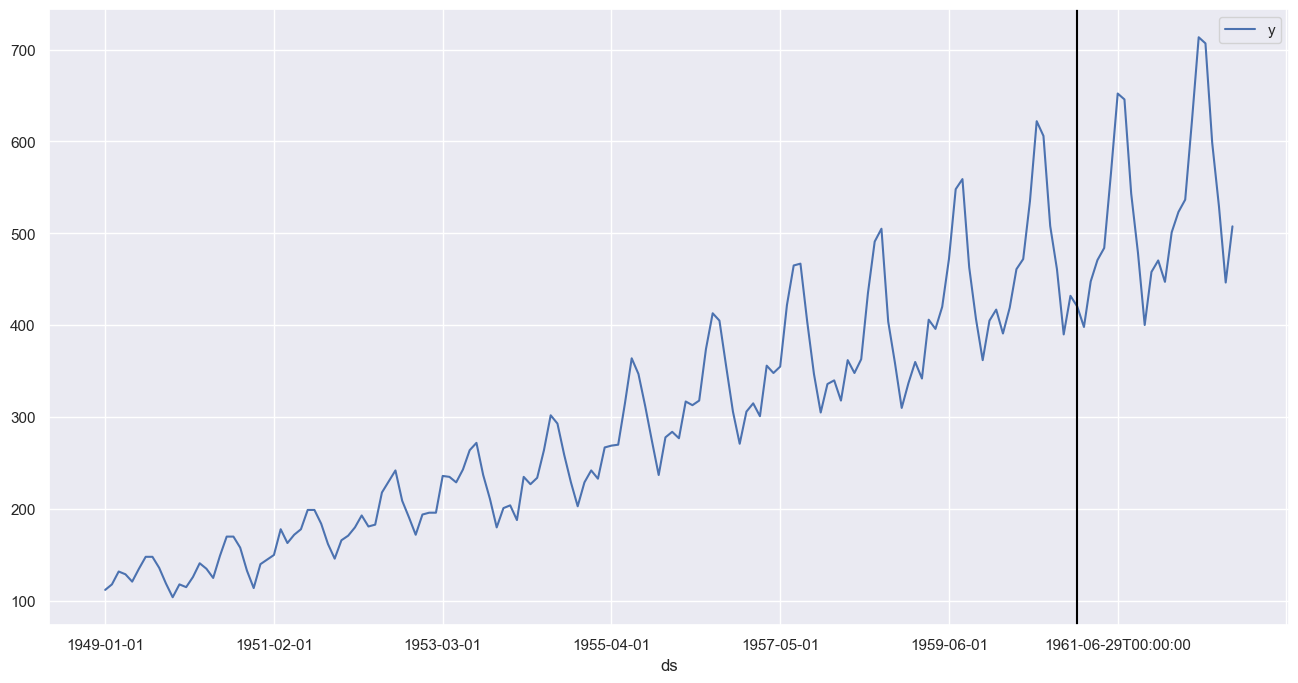

In [49]:
df.set_index("ds").plot(figsize=figsize, color=df["color"])
plt.axvline(x=len(train_df), color='black', label ='Train/Test set cut-off')
plt.show();